Uber, a ridesharing and food delivery service company releases its data. Can you download data about trips during various months and explore it. Can you find out what are the peak months in a year? What are the peak days and hours? What factors contribute to increase in number of rides? Does weather or special events have any impact on numbers?

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('D:/Users-Data/48189111/Downloads/UberEatsData.csv', index_col=1)
df.head(10)

,Date,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
DayOfWeek,,,,,,,,,,,,,,,,,,
Monday,10/17/2022,18:34,4.68,NaN,21,13.371429,3.9,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0
Monday,10/17/2022,18:35,7.02,NaN,24,17.550000,5.2,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0
Monday,10/17/2022,18:36,9.53,NaN,36,15.883333,8.4,NaN,0,1.4,NaN,NaN,NaN,NaN,2,0,0,0
Monday,10/17/2022,18:37,6.21,6.21,17,21.917647,3.6,14.0,1,1.4,0.133333,1.95,0.26,4.0,1,0,0,0
Monday,10/17/2022,18:41,2.44,NaN,15,9.760000,2.6,NaN,0,1.4,NaN,NaN,NaN,NaN,1,1,0,0
Monday,10/17/2022,18:54,13.72,NaN,34,24.211765,15.2,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0
Monday,10/17/2022,18:54,2.00,NaN,14,8.571429,2.4,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0
Monday,10/17/2022,18:54,8.74,NaN,50,10.488000,13.7,NaN,0,1.4,NaN,NaN,NaN,NaN,2,0,0,0
Monday,10/17/2022,18:55,5.52,NaN,28,11.828571,7.6,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0


Here's a breakdown of the columns:

Date: The date of the trip.
DayOfWeek: The day of the week when the trip occurred.
Time: The time of the trip.
Expected Earnings: The expected earnings for the trip.
ActualEarnings: The actual earnings from the trip.
Time predicted: Predicted time for the trip.
Hourly: Hourly rate.
Distance: The distance of the trip.
ActualTime: The actual time taken for the trip.
Accepted: Whether the trip was accepted.
Boost: Boost amount.
ActualBoost: The actual boost amount.
BaseFare: The base fare for the trip.
Promotion: Any promotional amount applied.
Tip: Tip received for the trip.
NumberOfDeliveries: Number of deliveries made.
Addon: Additional amount.
AddedOn: Any additional amount added on.
Cancled: Whether the trip was canceled.

In [5]:
print(df.shape)

(109, 18)


In [7]:
# Examine the data: check number of rows and number of columns
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 109
Number of columns: 18


In [8]:
# Look at the statistical summary of the dataframe
summary = df.describe()

print(summary)

       Expected Earnings  ActualEarnings  Time predicted      Hourly  \
count         109.000000       21.000000      109.000000  109.000000   
mean            7.344128        9.146667       26.229358   17.013724   
std             3.422586        4.498982        8.954239    6.369458   
min             1.710000        3.790000        9.000000    6.200000   
25%             4.720000        6.450000       19.000000   13.096552   
50%             6.880000        8.020000       25.000000   16.285714   
75%             9.530000        9.530000       32.000000   20.600000   
max            20.180000       23.850000       52.000000   43.000000   

         Distance  ActualTime    Accepted       Boost  ActualBoost   BaseFare  \
count  109.000000   20.000000  109.000000  108.000000    19.000000  19.000000   
mean     7.242202   24.100000    0.201835    1.344444     0.122699   2.674211   
std      9.407575   13.250223    0.403224    0.095049     0.078156   1.276054   
min      0.300000    4.0000

In [16]:
# Check how many classes we do have from the "Date" column
class_counts =df['Date'].value_counts()

print("Number of classes in the 'class' column:")
print(class_counts)

Number of classes in the 'class' column:
Date
10/21/2022    24
10/23/2022    20
10/17/2022    18
10/22/2022    17
10/19/2022    12
10/20/2022    10
10/18/2022     8
Name: count, dtype: int64


In [21]:
# Check number of samples for each class and comment whether dataset is balanced?
class_counts = df['Date'].value_counts()

print("Number of samples for each class:")
print(class_counts)

# Check if the dataset is balanced or not
is_balanced = all(count == class_counts.iloc[0] for count in class_counts)
if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")

Number of samples for each class:
Date
10/21/2022    24
10/23/2022    20
10/17/2022    18
10/22/2022    17
10/19/2022    12
10/20/2022    10
10/18/2022     8
Name: count, dtype: int64
The dataset is imbalanced.


In [22]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# For example, drop rows with missing values
df = df.dropna()

Date                   0
Time                   0
Expected Earnings      0
ActualEarnings        88
Time predicted         0
Hourly                 0
Distance               0
ActualTime            89
Accepted               0
Boost                  1
ActualBoost           90
BaseFare              90
Promotion             90
Tip                   90
NumberOfDeliveries     0
Addon                  0
AddedOn                0
Cancled                0
dtype: int64


In [31]:
print(df.columns)

Index(['Date', 'Time', 'Expected Earnings', 'ActualEarnings', 'Time predicted',
       'Hourly', 'Distance', 'ActualTime', 'Accepted', 'Boost', 'ActualBoost',
       'BaseFare', 'Promotion', 'Tip', 'NumberOfDeliveries', 'Addon',
       'AddedOn', 'Cancled'],
      dtype='object')


In [33]:
# Peak Days
if 'DayOfWeek' in df.columns:
    peak_days = df['DayOfWeek'].value_counts().idxmax()
    print("Peak Day:", peak_days)
else:
    print("DayOfWeek column not found in the dataset.")


DayOfWeek column not found in the dataset.


In [38]:
# Identify Peak Months and Hours
if 'Date' in df.columns:
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Peak Months
    peak_months = df['Date'].dt.month.value_counts().idxmax()
    print("Peak Month:", peak_months)

if 'Time' in df.columns:
    # Peak Hours
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour
    peak_hours = df['Hour'].value_counts().idxmax()
    print("Peak Hour:", peak_hours)


Peak Month: 10
Peak Hour: 19


C:\Users\48189111\AppData\Local\Temp\ipykernel_27064\3994366225.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


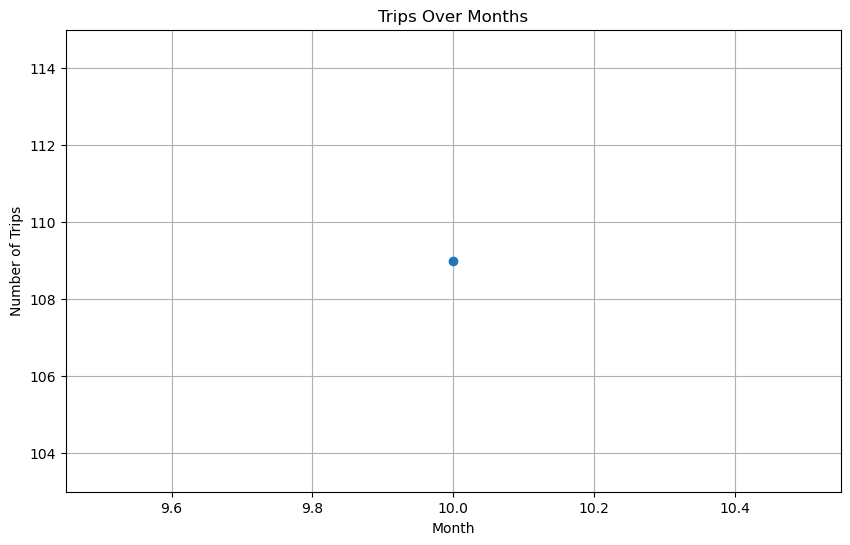

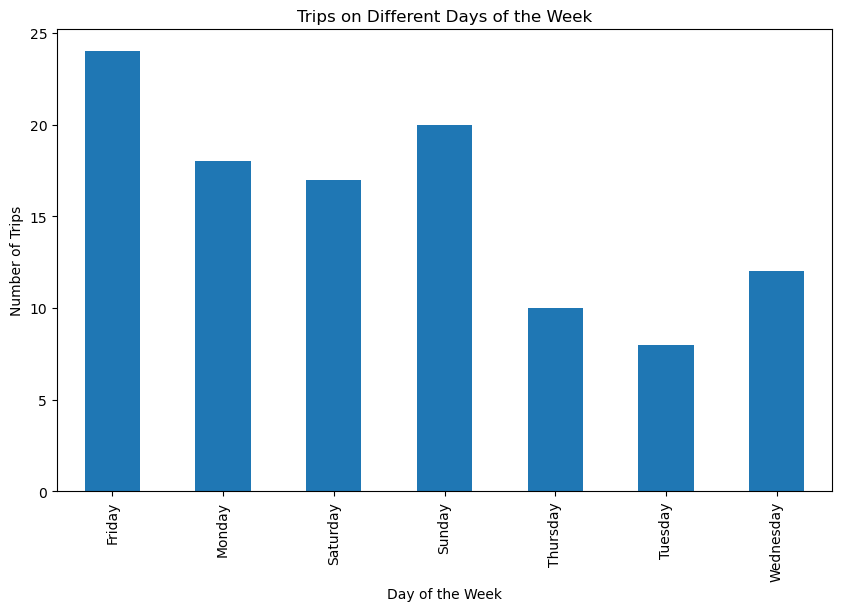

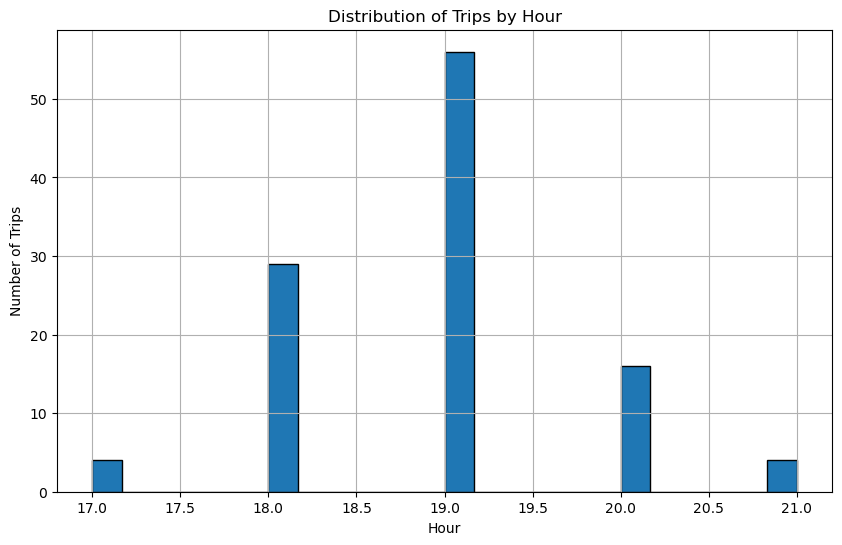

In [39]:
import matplotlib.pyplot as plt

# Line plot for trips over months
plt.figure(figsize=(10, 6))
df['Month'] = df['Date'].dt.month
df.groupby('Month').size().plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips Over Months')
plt.grid(True)
plt.show()

# Bar plot for trips on different days of the week
plt.figure(figsize=(10, 6))
df.groupby('DayOfWeek').size().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Trips on Different Days of the Week')
plt.show()

# Histogram for distribution of trips by hour
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Hour')
plt.grid(True)
plt.show()


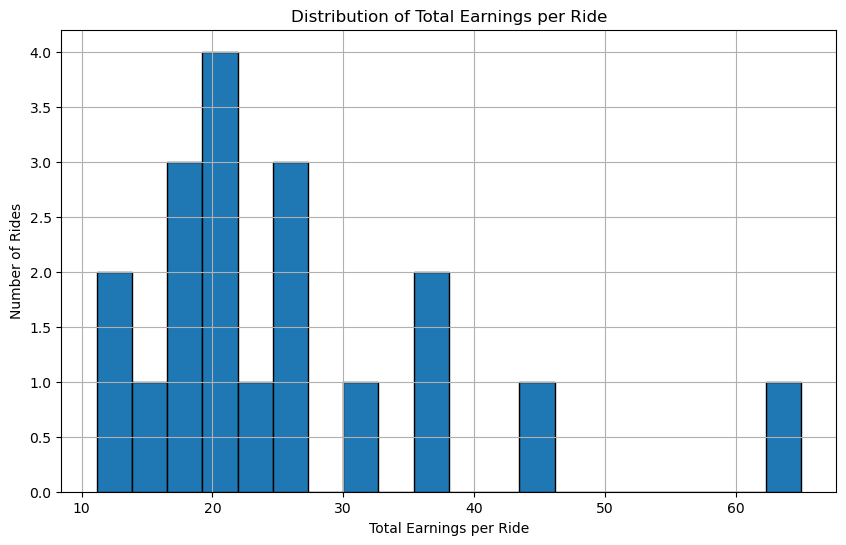

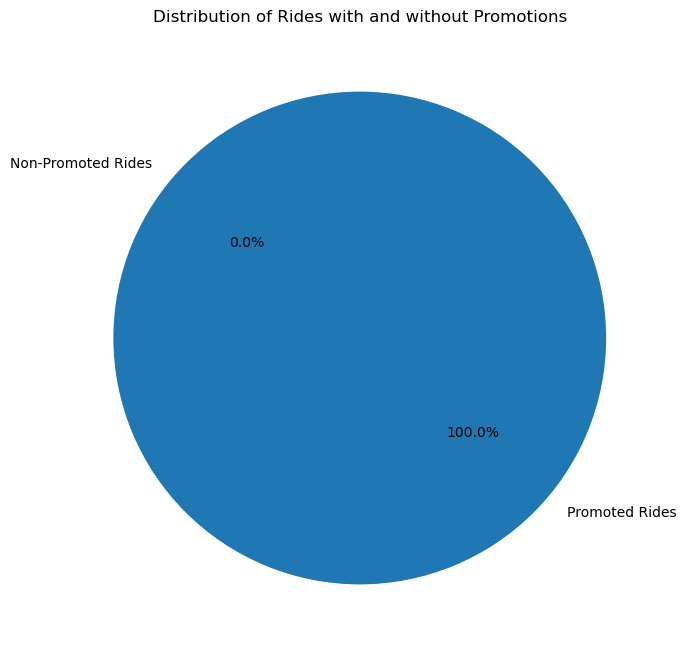

In [40]:
# Analyze Factors Contributing to Increase in Rides
# Let's focus on the following columns: 'Expected Earnings', 'ActualEarnings', 'Boost', 'Promotion', 'Tip'

# Calculate the total earnings per ride
df['TotalEarnings'] = df['Expected Earnings'] + df['ActualEarnings'] + df['Boost'] + df['Promotion'] + df['Tip']

# Plot histogram for total earnings per ride
plt.figure(figsize=(10, 6))
plt.hist(df['TotalEarnings'], bins=20, edgecolor='black')
plt.xlabel('Total Earnings per Ride')
plt.ylabel('Number of Rides')
plt.title('Distribution of Total Earnings per Ride')
plt.grid(True)
plt.show()

# Calculate the total number of rides with and without promotions
promoted_rides = df[df['Promotion'] > 0]['Promotion'].count()
non_promoted_rides = df[df['Promotion'] == 0]['Promotion'].count()

# Plot pie chart for the distribution of rides with and without promotions
labels = ['Promoted Rides', 'Non-Promoted Rides']
sizes = [promoted_rides, non_promoted_rides]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rides with and without Promotions')
plt.show()


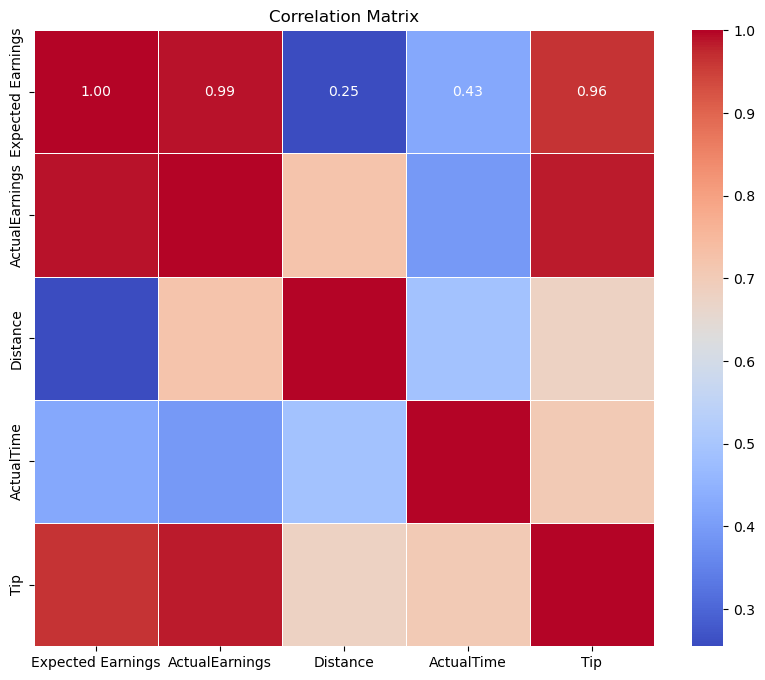

In [41]:
# Correlation Analysis
correlation_matrix = df[['Expected Earnings', 'ActualEarnings', 'Distance', 'ActualTime', 'Tip']].corr()

# Visualize correlation matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


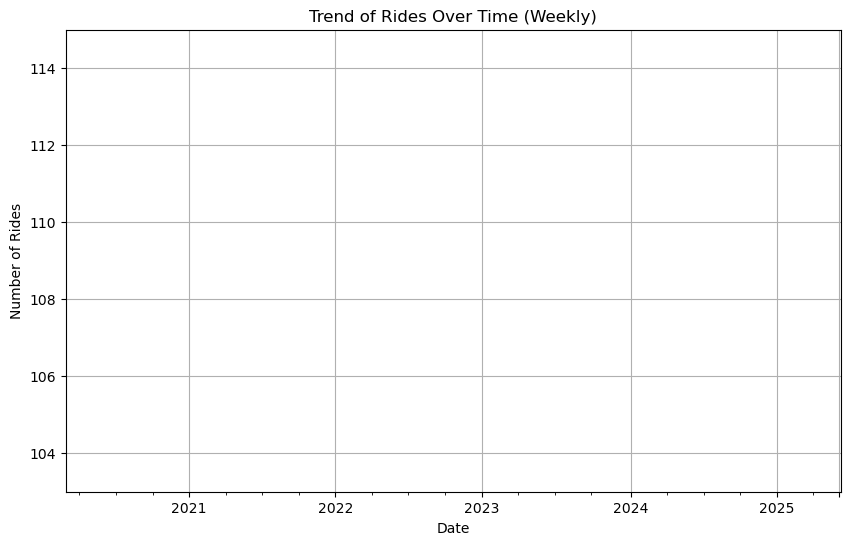

In [56]:
import warnings

# Suppress the warning from Matplotlib
warnings.filterwarnings("ignore", message="Attempting to set identical")

# Plot the trend of rides over time
plt.figure(figsize=(10, 6))
weekly_rides.plot()
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Trend of Rides Over Time (Weekly)')
plt.grid(True)
plt.show()


In [60]:
from sklearn.impute import SimpleImputer

# Impute missing values in the target variable (y) using median imputation
y_imputer = SimpleImputer(strategy='median')
y_train_imputed = y_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = y_imputer.transform(y_test.values.reshape(-1, 1))


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Drop irrelevant columns for prediction
X = df.drop(['ActualEarnings', 'ActualTime', 'Cancled'], axis=1)  # Drop 'ActualEarnings' and 'ActualTime' as they leak information about the target
y = df['ActualEarnings']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the target variable (y) using median imputation
y_imputer = SimpleImputer(strategy='median')
y_train_imputed = y_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = y_imputer.transform(y_test.values.reshape(-1, 1))

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append the linear regression model to the preprocessing steps
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model on the training data with imputed target variable
model.fit(X_train, y_train_imputed)

# Evaluate the model on the testing data
score = model.score(X_test, y_test_imputed)
print("Model R^2 Score:", score)


Model R^2 Score: 0.9606272601073269


In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test_imputed, y_pred)
print("R^2 Score:", r2)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test_imputed, y_pred)
print("Mean Absolute Error:", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test_imputed, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test_imputed, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


R^2 Score: 0.9606272601073269
Mean Absolute Error: 0.1048353704070117
Mean Squared Error: 0.07815548253199996
Root Mean Squared Error: 0.27956302068048977


the value for mse is Smaller so it makes MSE better and R squared value is close to 1 is better, so overall it makes the graph overall performance higher